<a href="INSERT_colab_R_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSERT_exercise_3

In [31]:
#| label: exercise_3_signature
#’ @param label ground truth vector of the form (n_samples,).
#’ Labels should be "1","2","3" and so on.
#’ @param pred Predicted probabilities of the form (n_samples,n_labels)
#’ @param smoothing Hyperparameter for label-smoothing
smoothed_ce_loss <- function(
label,
pred,
smoothing){
return (loss)
}


INSERT_solution

INSERT_solution_motivation

In [32]:
#| label: motivation
g      <- 10                     # number of classes
betas  <- c(0, 0.05, 0.25, 0.5)  # we include 0 to compare with standard CE
n_pts  <- 1000                   # resolution of the x-axis

smoothed_ce <- function(p, g, beta) {
  eps       <- .Machine$double.eps   # in order to avoid having log(0)
  p_other   <- (1 - p) / (g - 1)     # uniform probs for wrong classes
  t_true    <- 1 - beta + beta / g   # smoothed target for true class
  t_other   <- beta / g              # target for each wrong class

  -( t_true * log(p + eps) +
     (g - 1) * t_other * log(p_other + eps) )
}
# getting the loss for various betas and predicted probabilities
p_vals <- seq(0.001, 0.999, length.out = n_pts)          
loss <- sapply(betas, function(b) smoothed_ce(p_vals, g, b))

INSERT_motivation_plotting

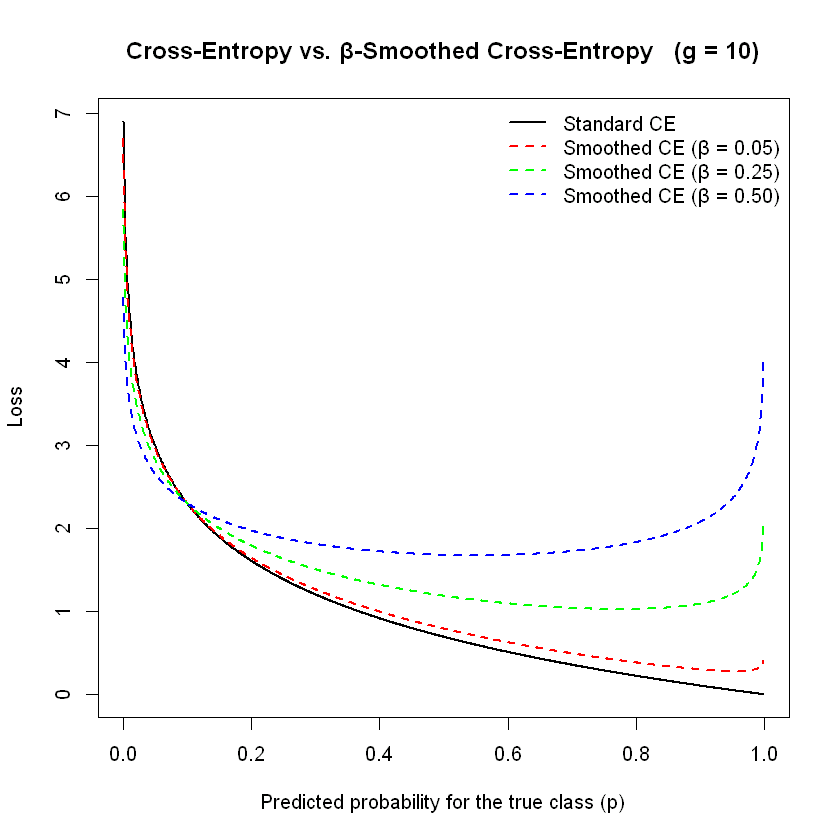

In [33]:
#| label: motivation_plotting
cols <- c("black", rainbow(length(betas) - 1))            
ltys <- c(1, rep(2, length(betas) - 1))                   

matplot(
  x     = p_vals,
  y     = loss,
  type  = "l",
  lty   = ltys,
  lwd   = 2,
  col   = cols,
  xlab  = "Predicted probability for the true class (p)",
  ylab  = "Loss",
  main  = sprintf("Cross-Entropy vs. β-Smoothed Cross-Entropy   (g = %d)", g)
)

legend_labels <- ifelse(
  betas == 0,
  "Standard CE",
  sprintf("Smoothed CE (β = %.2f)", betas)
)
legend(
  "topright",
  legend = legend_labels,
  col    = cols,
  lty    = ltys,
  lwd    = 2,
  bty    = "n"
)


INSERT_motivation_interpretation

INSERT_solution_main

In [34]:
#| label: full_solution
#' @param label ground truth vector of the form (n_samples,).
#'  Labels should be "1","2","3" and so on.
#' @param pred Predicted probabilities of the form (n_samples,n_labels)
#' @param smoothing Hyperparameter for label-smoothing

smoothed_ce_loss <- function(
	label,
	pred,
	smoothing){
    cat("\nSmoothing coefficient:", smoothing, "\n")
	num_samples <- NROW(pred)
	num_classes <- NCOL(pred)

	# Let's make some assertions:
	# label should be a 1-D array.one-hot encoded label is not necessary 
	stopifnot(NCOL(label)==1)  
	# smoothing hyperparameter in allowed range
	stopifnot((smoothing>=0 & smoothing <= 1)) 
	# Same amount of rows in labels and predictions
	stopifnot((NROW(label)== num_samples))
	# Predicted probabilities must have as many columns as labels  
	stopifnot(length(unique(label)) == num_classes)
		
	# Calculate the base level
	smoothing_per_class <- smoothing / num_classes

	# build the label matrix. Shape = [ num_samples, num_classes]
	# Start with the base level
	smoothed_labels_matrix <- matrix(smoothing_per_class,
									nrow=num_samples,ncol=num_classes) 
	# Add the smoothed correct labels
	true_labels_loc <- cbind(1:num_samples, label)
	smoothed_labels_matrix[true_labels_loc] = 1 - smoothing + smoothing_per_class
	cat("Labels matrix:\n")
	print(smoothed_labels_matrix)

	# Calculate the loss
	cat("Loss for each sample:\n ",
		rowSums(- smoothed_labels_matrix * log(pred)))

	loss <- mean(rowSums(- smoothed_labels_matrix * log(pred)))
	cat("\n Loss:\n",loss)

	return (loss)
}


INSERT_confindent_model

In [35]:
label <- c(1, 2, 2, 3, 1, 1)
pred <- rbind(
		c(0.85, 0.10, 0.05), # 0.85 for the true label
		c(0.05, 0.90, 0.05), # 0.90 ...
		c(0.02, 0.95, 0.03), # 0.95
		c(0.13, 0.02, 0.85), # 0.85
		c(0.86, 0.04, 0.10), # 0.86
        c(0.34, 0.33, 0.33)) # 0.34 (not confident prediction)

# standard cross entropy (smoothing = 0)
loss <- smoothed_ce_loss(label, pred, smoothing=0)

# Smoothed cross entropy (smoothing = 0.2)
loss_smooth <-smoothed_ce_loss(label, pred, smoothing=0.2)

cat("\nLoss increased by a factor of",
    round(loss_smooth / loss, 2),
    "when using label smoothing with β = 0.2.\n")


Smoothing coefficient: 0 
Labels matrix:
     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    1    0
[4,]    0    0    1
[5,]    1    0    0
[6,]    1    0    0
Loss for each sample:
  0.1625189 0.1053605 0.05129329 0.1625189 0.1508229 1.07881
 Loss:
 0.2852207


Smoothing coefficient: 0.2 
Labels matrix:
           [,1]       [,2]       [,3]
[1,] 0.86666667 0.06666667 0.06666667
[2,] 0.06666667 0.86666667 0.06666667
[3,] 0.06666667 0.86666667 0.06666667
[4,] 0.06666667 0.06666667 0.86666667
[5,] 0.86666667 0.06666667 0.06666667
[6,] 0.86666667 0.06666667 0.06666667
Loss for each sample:
  0.4940709 0.4907434 0.5390262 0.537666 0.4988106 1.08279
 Loss:
 0.6071845
Loss increased by a factor of 2.13 when using label smoothing with β = 0.2.


INSERT_solution_interpretation